In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import random as rn
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
images = []
labels = []
IMG_SIZE = 180
DIR_BASE = '/content/drive/Shareddrives/NoLinger/datasets/chips-simple-aumented'
DIR_ADOBADAS = DIR_BASE + '/adobadas'
DIR_CHIPS = DIR_BASE + '/chips'
DIR_DORITOS = DIR_BASE + '/doritos'
DIR_JALAPENO = DIR_BASE + '/jalapeno'
DIR_RANCHERITOS = DIR_BASE + '/rancheritos'
DIR_RUFFLES = DIR_BASE + '/ruffles'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
def get_file_ext(DIR):
  ext = []
  for file in os.listdir(DIR):
    name, file_ext = os.path.splitext(file)
    ext.append(file_ext)
  print(set(ext))

In [5]:
def valid_image(file, ext=[".jpg",".jpeg"]):
  name, file_ext = os.path.splitext(file)
  isFile = os.path.isfile(file)
  isImage = file_ext.lower() in ext
  return isFile and isImage

In [6]:
get_file_ext(DIR_ADOBADAS)
get_file_ext(DIR_CHIPS )
get_file_ext(DIR_DORITOS )
get_file_ext(DIR_JALAPENO )
get_file_ext(DIR_RANCHERITOS )
get_file_ext(DIR_RUFFLES )

{'.jpeg'}
{'.jpeg'}
{'.jpeg'}
{'.jpeg'}
{'.jpeg'}
{'.jpeg'}


In [7]:
def build_data_base(label, dir):
  global images, labels
  for file in tqdm(os.listdir(dir)):
    path = os.path.join(dir, file)
    if valid_image(path):
      img = tf.keras.preprocessing.image.load_img(path, color_mode='rgb')
      matrix_img = tf.keras.preprocessing.image.img_to_array(img)
      matrix_img = tf.image.resize(matrix_img/255,[IMG_SIZE, IMG_SIZE])
      images.append(matrix_img.numpy())
      labels.append(label)

In [8]:
clases = ['adobadas','chips','doritos','jalapeno','rancheritos', 'ruffles']
build_data_base(0, DIR_ADOBADAS)
build_data_base(1, DIR_CHIPS)
build_data_base(2, DIR_DORITOS)
build_data_base(3, DIR_JALAPENO)
build_data_base(4, DIR_RANCHERITOS)
build_data_base(5, DIR_RUFFLES)

100%|██████████| 135/135 [00:54<00:00,  2.45it/s]


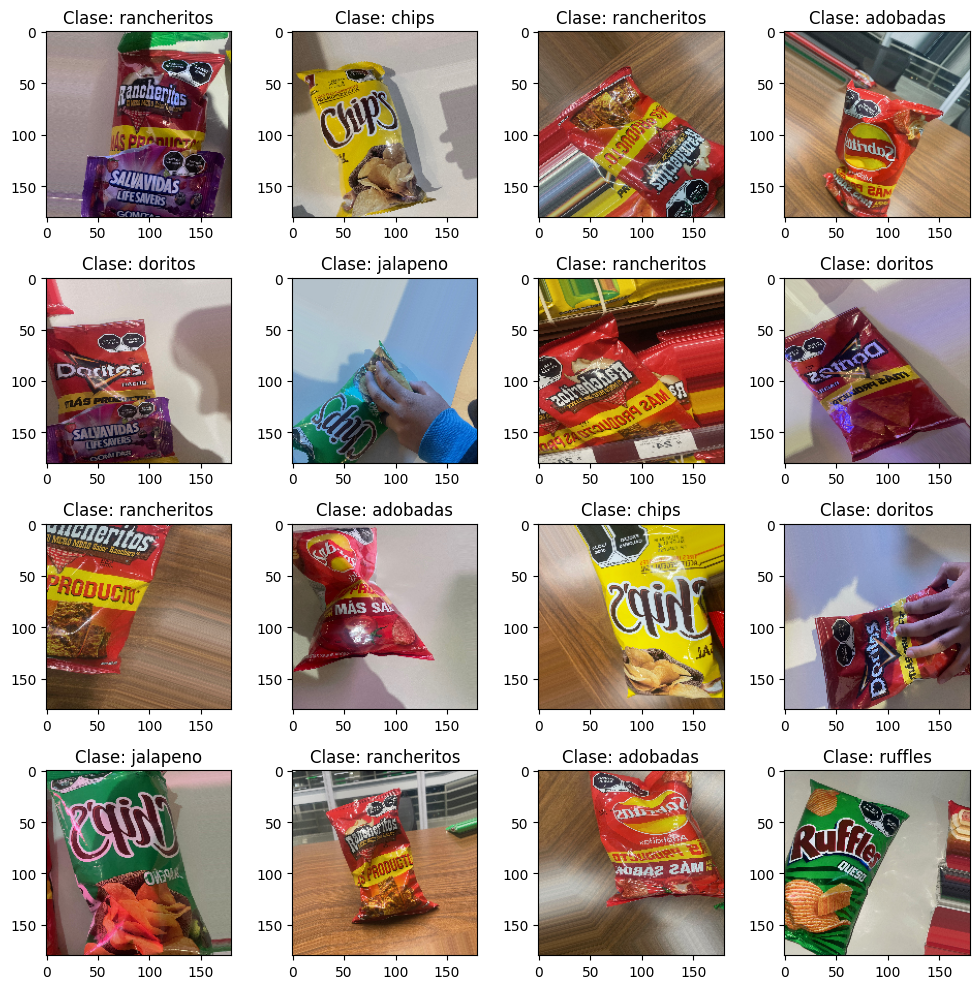

In [9]:
fig, ax = plt.subplots(4,4)
fig.set_size_inches(10,10)
for i in range(4):
    for j in range (4):
        l=rn.randint(0,len(labels))
        ax[i,j].imshow(images[l])
        ax[i,j].set_title('Clase: '+clases[labels[l]])
plt.tight_layout()

In [10]:
label_encoder = LabelEncoder()
label_keys = label_encoder.fit_transform(labels)
label_keys = tf.keras.utils.to_categorical(label_keys, 6)
print(label_keys)

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


In [11]:
train, test, label_train, label_test = train_test_split(images, labels, test_size=0.15, random_state=42)

train = np.array(train)
test = np.array(test)

label_train= np.array(label_train)
label_test = np.array(label_test)

In [12]:
np.random.seed(rn.randint(0,10))
rn.seed(rn.randint(0,10))
tf.random.set_seed(rn.randint(0,10))

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(5,5),activation='relu',padding='Same', input_shape=(IMG_SIZE, IMG_SIZE,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='Same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(96,(3,3),activation='relu',padding='Same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='Same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(6,activation='softmax')

])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 22, 22, 96)        0

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
evolution = model.fit(train, label_train, validation_data=(test, label_test), epochs=60, batch_size=128)

Epoch 1/60
6/6 [==============================] - 20s 742ms/step - loss: 1.9176 - accuracy: 0.1711 - val_loss: 1.7884 - val_accuracy: 0.2632
Epoch 2/60
6/6 [==============================] - 1s 155ms/step - loss: 1.7804 - accuracy: 0.2032 - val_loss: 1.7608 - val_accuracy: 0.3308
Epoch 3/60
6/6 [==============================] - 1s 170ms/step - loss: 1.7154 - accuracy: 0.3382 - val_loss: 1.5966 - val_accuracy: 0.3158
Epoch 4/60
6/6 [==============================] - 1s 170ms/step - loss: 1.5010 - accuracy: 0.4118 - val_loss: 1.4202 - val_accuracy: 0.3835
Epoch 5/60
6/6 [==============================] - 1s 153ms/step - loss: 1.1730 - accuracy: 0.5374 - val_loss: 1.5035 - val_accuracy: 0.3985
Epoch 6/60
6/6 [==============================] - 1s 167ms/step - loss: 1.0394 - accuracy: 0.5762 - val_loss: 1.1598 - val_accuracy: 0.4812
Epoch 7/60
6/6 [==============================] - 1s 159ms/step - loss: 0.8695 - accuracy: 0.6123 - val_loss: 1.0965 - val_accuracy: 0.4211
Epoch 8/60
6/6 [===

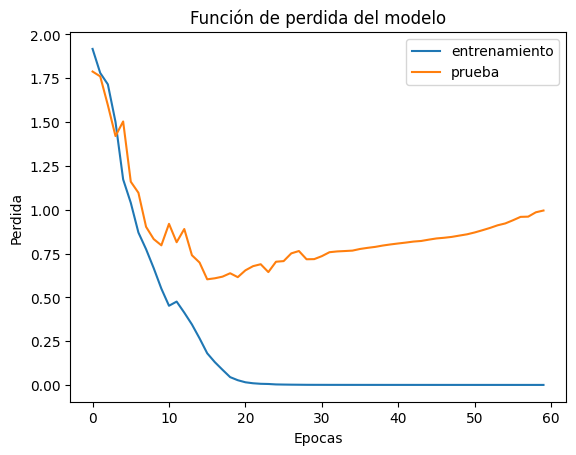

In [15]:
plt.figure()
plt.plot(evolution.history['loss'])
plt.plot(evolution.history['val_loss'])
plt.title('Función de perdida del modelo')
plt.ylabel('Perdida')
plt.xlabel('Epocas')
plt.legend(['entrenamiento', 'prueba'])
plt.show()

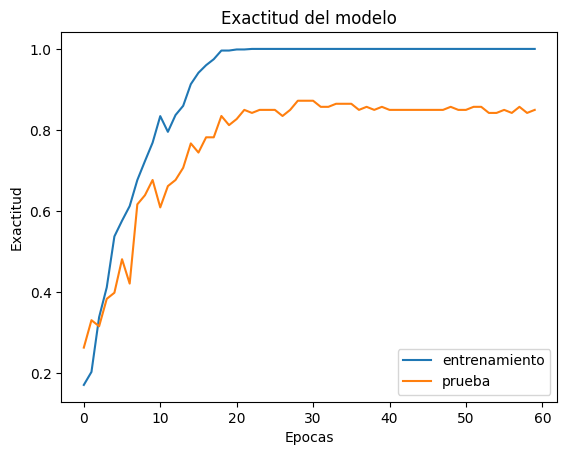

In [16]:
plt.figure()
plt.plot(evolution.history['accuracy'])
plt.plot(evolution.history['val_accuracy'])
plt.title('Exactitud del modelo')
plt.ylabel('Exactitud')
plt.xlabel('Epocas')
plt.legend(['entrenamiento', 'prueba'])
plt.show()

In [17]:
predictions = model.predict(test)
predicitons_labels = np.argmax(predictions, axis=1)

5/5 [==============================] - 1s 11ms/step


In [43]:
from tensorflow._api.v2 import random
sample = [rn.randint(0, len(test) -1) for _ in range(8)]
sample_labels = []


for i in sample:
  sample_labels.append(predicitons_labels[i])

print(sample)
print(sample_labels)

[115, 53, 99, 75, 3, 90, 72, 36]
[4, 1, 4, 3, 4, 5, 2, 0]


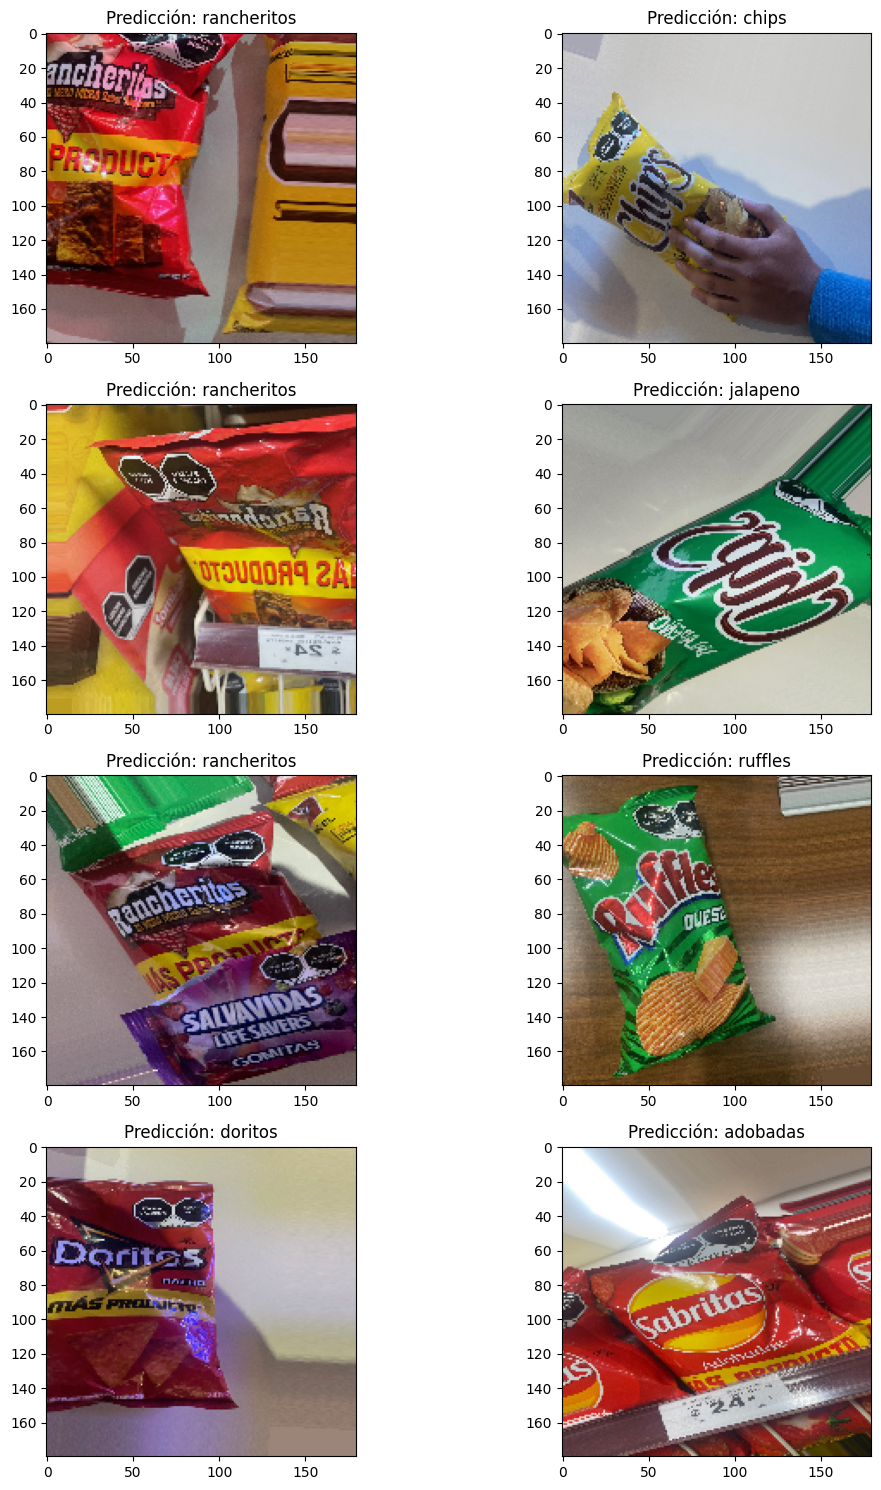

In [44]:
contador=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(test[sample[contador]])
        ax[i,j].set_title("Predicción: " + clases[sample_labels[contador]])
        plt.tight_layout()
        contador+=1